In [ ]:
import warnings
warnings.filterwarnings("ignore") # For the warnings about the versions libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_excel('/content/insurance_data_1000.xlsx')

In [ ]:

df.columns

Index(['case_id', 'income', 'age', 'sex', 'approval', 'fraud', 'claims'], dtype='object')

In [ ]:
df.head(30)

,case_id,income,age,sex,approval,fraud,claims
0,59982,35750.95,42,M,Approved,Under Review,9518.95
1,87249,24078.27,19,M,Denied,No,19354.23
2,50406,39241.52,37,M,Denied,Fraud,13056.04
3,59391,33248.31,26,M,Approved,No,19238.37
4,96622,38649.96,54,M,Approved,No,14427.42
5,56519,39001.26,43,F,Denied,No,14659.06
6,89783,36862.26,46,F,Approved,No,11390.09
7,99992,42827.23,47,F,Denied,No,17272.75
8,40096,34838.49,25,M,Approved,No,13164.17
9,1710,34714.20,27,F,Approved,No,11267.48


In [ ]:
333000/120000000

0.002775

<Axes: xlabel='fraud', ylabel='count'>

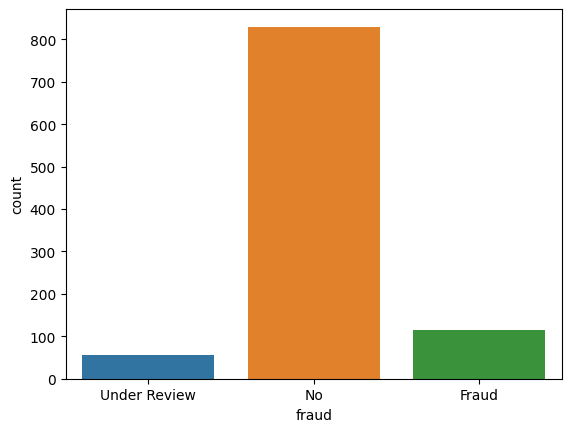

In [ ]:
sns.countplot(x="fraud", data=df)

In [ ]:
df1 = df.loc[(df['fraud']=='No' )|(df['fraud']=='Fraud' )]
df1

,case_id,income,age,sex,approval,fraud,claims
1,87249,24078.27,19,M,Denied,No,19354.23
2,50406,39241.52,37,M,Denied,Fraud,13056.04
3,59391,33248.31,26,M,Approved,No,19238.37
4,96622,38649.96,54,M,Approved,No,14427.42
5,56519,39001.26,43,F,Denied,No,14659.06
...,...,...,...,...,...,...,...
995,96947,11353.88,81,M,Approved,No,15781.10
996,87668,8799.08,37,M,Approved,No,37004.41
997,39658,13143.52,35,M,Approved,Fraud,33580.79
998,77914,9473.25,36,F,Denied,No,27975.41


<Axes: xlabel='fraud', ylabel='count'>

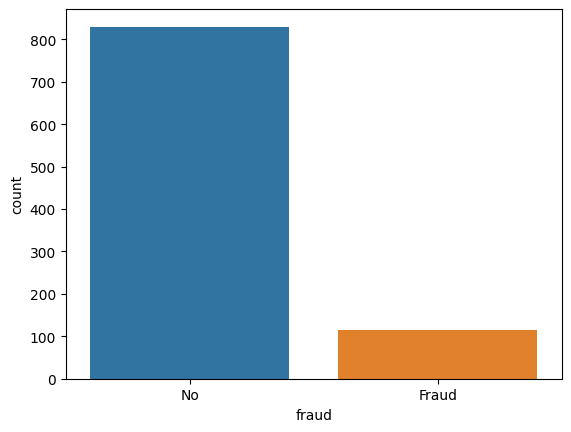

In [ ]:
sns.countplot(x="fraud", data=df1)

In [ ]:
X= df1[['income', 'age', 'sex', 'approval','claims']]
y = df1["fraud"]

arreglo = RandomUnderSampler(sampling_strategy=0.3)
X1, y1 = arreglo.fit_resample(X,y)
y_1 = pd.DataFrame(y1, columns=["fraud"])
sns.countplot(x="fraud", data=y_1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
logit_model = linear_model.LogisticRegression().fit(X_train,y_train)
print("el modelo ajusta al  ", (logit_model.score(X_train,y_train)) * 100, " por ciento")
print("el intercepto (b0) es: ", logit_model.intercept_)
print("los coficientes son: ", logit_model.coef_)

ValueError: ignored

In [ ]:
df1['fraud']=df1['fraud'].replace({'No':0,'Fraud':1})

df1.head()

,case_id,income,age,sex,approval,fraud,claims
1,87249,24078.27,19,M,Denied,0,19354.23
2,50406,39241.52,37,M,Denied,1,13056.04
3,59391,33248.31,26,M,Approved,0,19238.37
4,96622,38649.96,54,M,Approved,0,14427.42
5,56519,39001.26,43,F,Denied,0,14659.06


In [ ]:
df1 = pd.get_dummies(df1,columns=['sex','approval'],drop_first=True)
df1.head()

,case_id,income,age,fraud,claims,sex_M,approval_Denied
1,87249,24078.27,19,0,19354.23,1,1
2,50406,39241.52,37,1,13056.04,1,1
3,59391,33248.31,26,0,19238.37,1,0
4,96622,38649.96,54,0,14427.42,1,0
5,56519,39001.26,43,0,14659.06,0,1


In [ ]:
df1 = df1.rename(columns={'sex_M':'sex','approval_Denied':'Denied'})
df1

,case_id,income,age,fraud,claims,sex,Denied
1,87249,24078.27,19,0,19354.23,1,1
2,50406,39241.52,37,1,13056.04,1,1
3,59391,33248.31,26,0,19238.37,1,0
4,96622,38649.96,54,0,14427.42,1,0
5,56519,39001.26,43,0,14659.06,0,1
...,...,...,...,...,...,...,...
995,96947,11353.88,81,0,15781.10,1,0
996,87668,8799.08,37,0,37004.41,1,0
997,39658,13143.52,35,1,33580.79,1,0
998,77914,9473.25,36,0,27975.41,0,1


In [ ]:
X= df1[['income', 'age', 'sex', 'Denied','claims']]
y = df1["fraud"]

In [ ]:
X_test

,income,age,sex,Denied,claims
829,51123.50,19,0,0,5543.44
693,69652.70,56,0,0,5158.05
832,50859.85,23,0,0,4547.48
364,26578.48,27,0,0,15334.07
284,33172.28,32,0,0,12143.44
...,...,...,...,...,...
703,70795.74,55,1,0,5003.21
459,30227.74,44,0,1,15994.63
654,58707.08,57,0,0,5072.32
564,83881.99,56,1,1,5408.75


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
logit_model = linear_model.LogisticRegression().fit(X_train,y_train)
print("el modelo ajusta al  ", (logit_model.score(X_train,y_train)) * 100, " por ciento")
print("el intercepto (b0) es: ", logit_model.intercept_)
print("los coficientes son: ", logit_model.coef_)

el modelo ajusta al   87.74583963691377  por ciento
el intercepto (b0) es:  [-4.03739609e-09]
los coficientes son:  [[-2.28283424e-05 -1.29552006e-07  9.61715752e-11 -1.52878120e-09
  -6.74682674e-05]]


In [ ]:
probs = logit_model.predict_proba(X_test)
probs

array([[0.82362073, 0.17637927],
       [0.8741397 , 0.1258603 ],
       [0.81273185, 0.18726815],
       [0.83771301, 0.16228699],
       [0.82871808, 0.17128192],
       [0.86896666, 0.13103334],
       [0.81952406, 0.18047594],
       [0.85109706, 0.14890294],
       [0.82832263, 0.17167737],
       [0.89454526, 0.10545474],
       [0.89265229, 0.10734771],
       [0.87860609, 0.12139391],
       [0.92862034, 0.07137966],
       [0.89739014, 0.10260986],
       [0.82448605, 0.17551395],
       [0.91116494, 0.08883506],
       [0.95953237, 0.04046763],
       [0.96669921, 0.03330079],
       [0.84932714, 0.15067286],
       [0.8247294 , 0.1752706 ],
       [0.85743502, 0.14256498],
       [0.87305586, 0.12694414],
       [0.86479666, 0.13520334],
       [0.86376546, 0.13623454],
       [0.86106811, 0.13893189],
       [0.80438548, 0.19561452],
       [0.82060123, 0.17939877],
       [0.85902048, 0.14097952],
       [0.90920153, 0.09079847],
       [0.84121401, 0.15878599],
       [0.

In [ ]:
probs = logit_model.predict_proba(X_test)
prob = probs[:,1]
pred_prob = pd.DataFrame(prob)
pred_prob["predicción"]= np.where(pred_prob[0] > 0.6, 1,0)
pd.crosstab(pred_prob.predicción,columns="count")
pred_prob["real"]= list(y_test)
pd.crosstab(pred_prob.predicción,pred_prob.real)

real,0,1
predicción,,
0,250,34


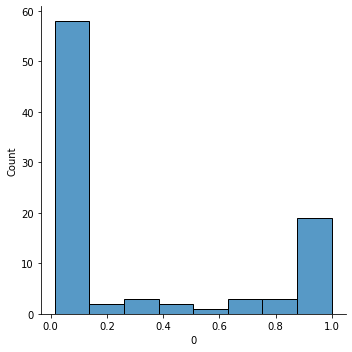

In [ ]:
sns.displot(pred_prob[0])

In [ ]:
prob

array([0.07126399, 0.99995626, 0.03008106, 0.03183859, 0.12856754,
       0.01934851, 0.01875449, 0.10165056, 0.03633417, 0.0266947 ,
       0.0280618 , 0.02908614, 0.42207187, 0.02864783, 0.02573548,
       0.99738577, 0.03186933, 0.98116982, 0.01512318, 0.09753685,
       0.13248266, 0.01481231, 0.02485832, 0.93431119, 0.99999967,
       0.62601677, 0.35476782, 0.0996828 , 0.82553116, 0.78265032,
       0.95211844, 0.03326776, 0.02778198, 0.72354649, 0.11960659,
       0.02382812, 0.06985366, 0.01807744, 0.03226686, 0.06388187,
       0.34854418, 0.08805059, 0.39351411, 0.02651165, 0.01684251,
       0.0162811 , 0.84099422, 0.02745261, 0.02277072, 0.03176262,
       0.7128721 , 0.02069958, 0.99999167, 0.99961607, 0.02620646,
       0.99999672, 0.99999999, 0.26933078, 0.02573288, 0.05423188,
       0.14629764, 0.99999399, 0.03405183, 0.96172934, 0.99996435,
       0.02788151, 0.63472842, 0.99990655, 0.01936159, 0.0251558 ,
       0.01990117, 0.03514583, 0.03194536, 0.01765717, 0.02271

Validación Cruzada. ¿la partición de los datos en train y test influye en el modelo?

In [ ]:
from sklearn.model_selection import cross_val_score
ajustes = cross_val_score(linear_model.LogisticRegression(), X,y, scoring="accuracy", cv = 10)
ajustes.mean()

0.8783314669652856

Matriz de confusión

In [ ]:
pred_prob["predicción"]= np.where(pred_prob[0] > 0.1, 1,0)
pd.crosstab(pred_prob.predicción,columns="count")
pred_prob["real"]= list(y_test)
MC = pd.crosstab(pred_prob.predicción,pred_prob.real)

VN = MC[0][0]
FN = MC[0][1]
FP = MC[1][0]
VP = MC[1][1]
MC

real,0,1
predicción,,
0,45,13
1,205,21


In [ ]:
# Sensibilidad ó Razón de verdaderos positivos
sens = VP / (VP + FP )
# Razón de falsos positivos
FP / (VN  + FP)
#Especificidad
esp = 1 - (FP / (VN  + FP))  #=  VN / (VP + FP)
print('sensibilidad',sens)
print('especificidad',esp)

sensibilidad 0.6176470588235294
especificidad 0.7758620689655172


Porcentaje de registros con buena predicción

In [ ]:
(VN + VP) / (VN + VP + FP + FN)

0.9340659340659341

In [ ]:
# Sensibilidad ó Razón de verdaderos positivos
sens = VP / (VP + FP )
# Razón de falsos positivos
FP / (VN  + FP)
#Especificidad
esp = 1 - (FP / (VN  + FP))  #=  VN / (VP + FP)
print(sens)
print(esp)

0.8571428571428571
0.9384615384615385


Curva de ROC

In [ ]:
import sklearn.metrics as metrics

In [ ]:
esp_1, sens_1,umbral = metrics.roc_curve(y_test,prob)
roc_auc = metrics.auc(esp_1, sens_1)

In [ ]:
umbral

array([1.99999999, 0.99999999, 0.93392972, 0.88324471, 0.63472842,
       0.42207187, 0.39351411, 0.03514583, 0.03405183, 0.02277072,
       0.02271257, 0.01936159, 0.01934851, 0.01420031])

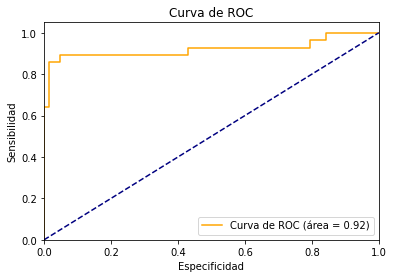

In [ ]:
### Plot
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(esp_1, sens_1, color='orange',
          label='Curva de ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Curva de ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
df = pd.DataFrame({
    "esp":espc_1,
    "sens":sensit
})